<a href="https://colab.research.google.com/github/jo-cho/Machine_Learning_Study/blob/main/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**머신러닝 스터디: 앙상블(ensemble)**

2025.4.29

author: 나혜림, 조정효

# 앙상블(Ensemble)

- **앙상블 학습**(**Ensemble Learning**): 여러 개의 모델(또는 분류기, 회귀기)을 결합하여 더 나은 성능을 도출하려는 기법

- 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합

- 단일 모델(single model)의 예측 성능에 의존하기보다, 다양한 모델들의 예측 결과를 종합하여 노이즈를 줄이고 **편향**(bias)과 **분산**(variance)을 균형 있게 줄이는 효과가 있음

## 배깅(Bagging) vs 부스팅(Boosting)

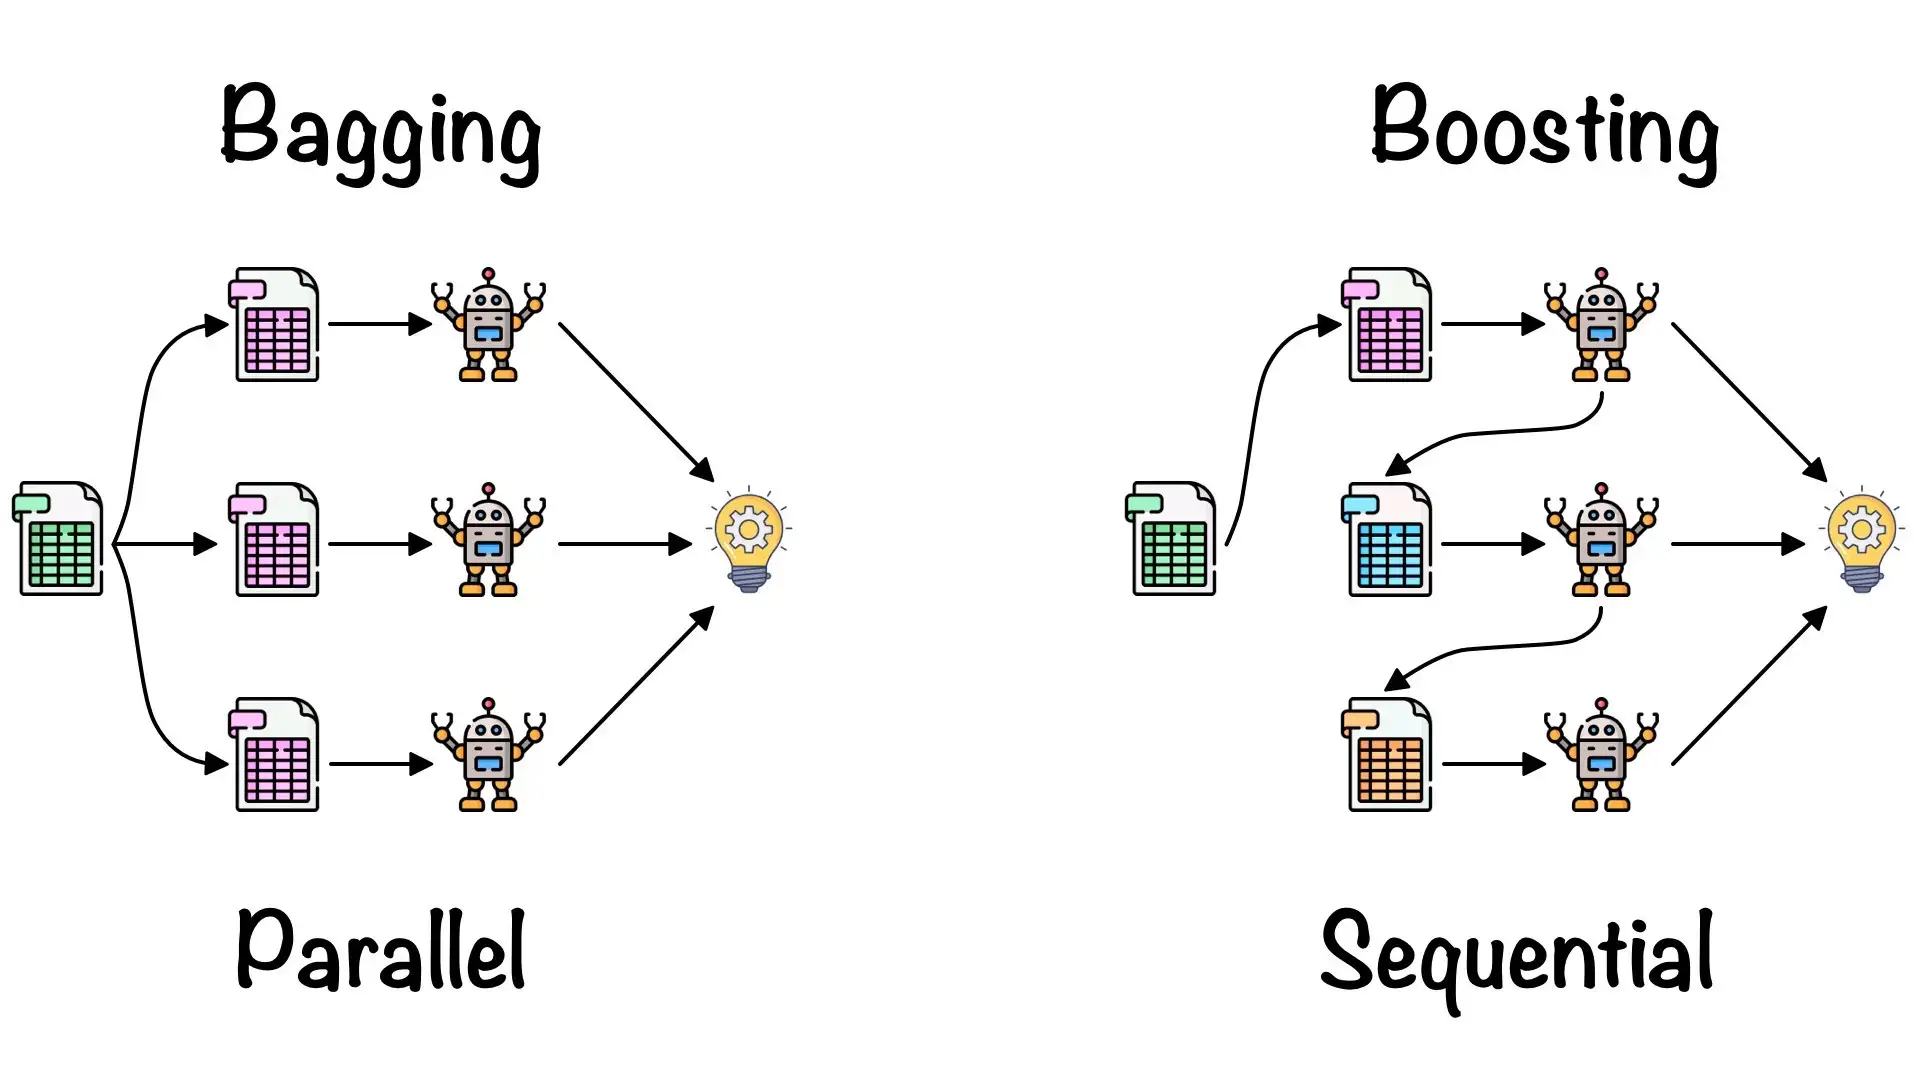

### 배깅(Bagging, Bootstrap Aggregating)

- 여러 개의 독립적인 분류(회귀)기들을 학습시킨 후 예측 결과를 **평균**(또는 **투표**, voting)으로 종합하는 방식
  - 회귀는 평균 / 분류는 투표

- 학습 데이터를 무작위로 샘플링(**부트스트랩**, Boostrap)하여 각 모델에 다른 샘플을 학습
  - 부트스트랩: 원본 데이터로부터 여러 번 데이터를 **복원추출**

- 즉, 여러 모델을 **병렬적**으로 학습시켜 예측을 평균/투표

- 목적: **분산 감소** → 과적합 방지

- 대표적으로 **Random Forest**(Decision Tree를 배깅으로 묶은 모델)가 있음.

### 부스팅(Boosting)

- 순차적으로 학습기를 쌓아올리면서, 이전 단계 모델이 틀린 샘플에 **가중치**를 더 주어 오차를 점차 줄여나가는 방식

- 각 단계에서 오차를 보완하도록 모델을 학습시키고, 최종적으로 **가중합**하여 결과를 도출

- 즉, 여러 모델을 **순차적**으로 학습시켜 이전 **오차를 보완**하면서 예측 성능을 향상

- 목적: **편향 감소** → 성능 향상 (과적합(overfitting) 위험 있음)

- 대표적으로 **AdaBoost**, **Gradient Boosting**(XGBoost, LightGBM, CatBoost 등 변형 기법 포함)이 있음.

## 보팅(Voting)

- 여러 분류기의 결과를 합쳐 최종 결과를 도출

- 하드 vs 소프트
  - 하드 보팅(Hard Voting): 다수결
  - 소프트 보팅(Soft Voting): 예측 확률(Predict Probability)의 평균 혹은 가중 평균

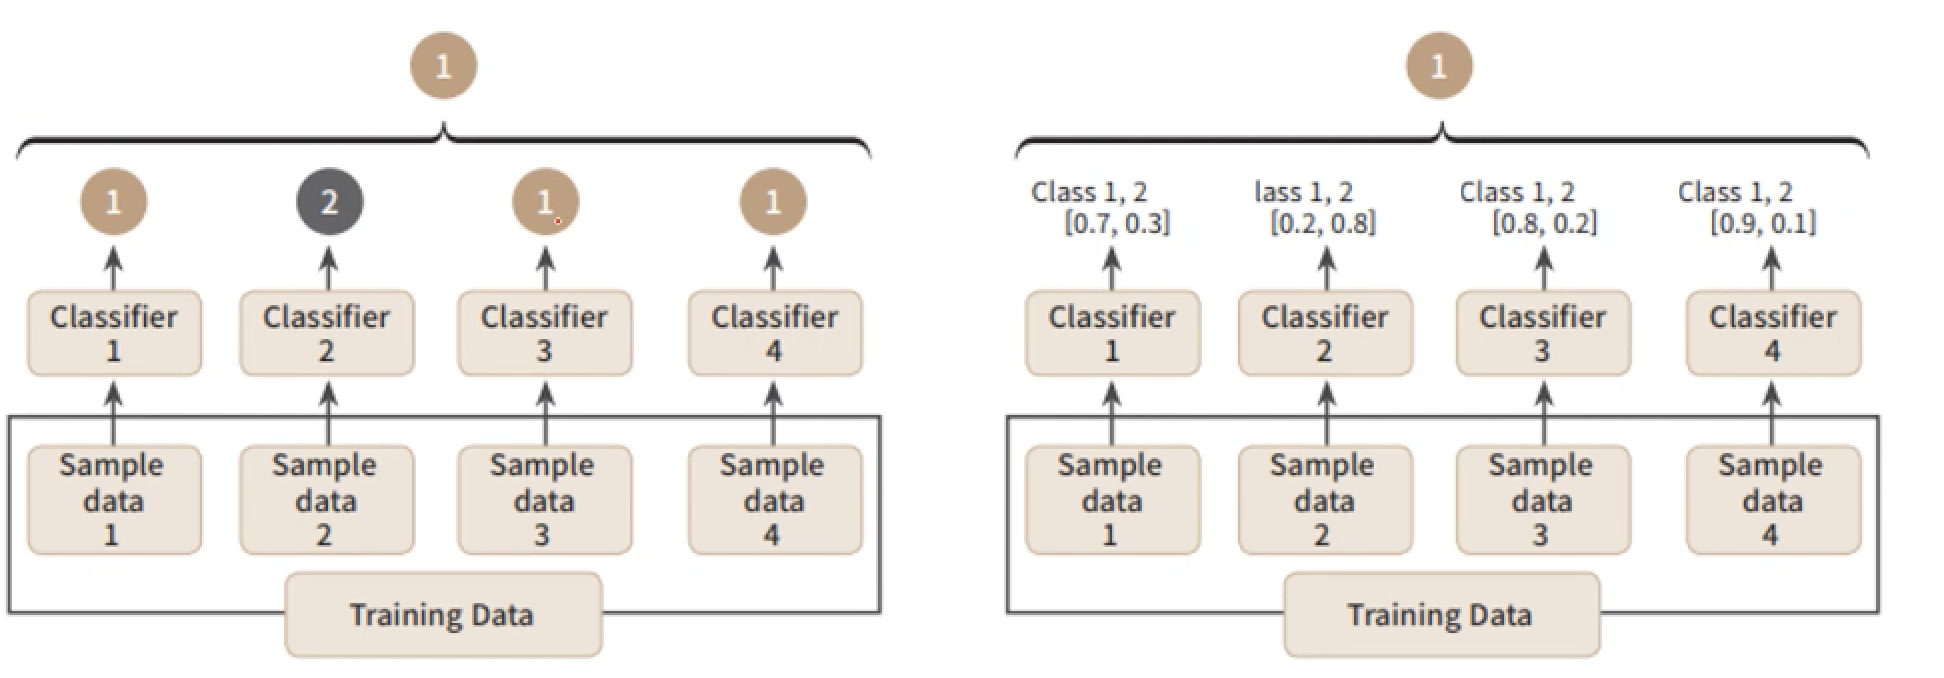

## 스태킹(Stacking)

- 다층(Multi-layer) 구조 앙상블

- 1단계(베이스) 모델이 예측한 결과(또는 확률)를 2단계(메타 모델) 입력으로 사용

- 베이스 모델을 여러 개 구성해 다채로운 예측 결과를 모으고, 이를 메타 모델이 재학습함으로써 학습의 유연성을 높임

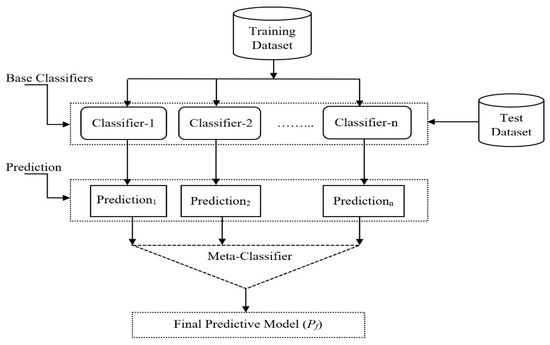

# 주요 모델

## Random Forest

- 랜덤 포레스트(Random Forest)는 **배깅**(**Bagging**) 방식으로 **결정 트리**(**Decision Tree**)를 다수 생성하여 예측 결과를 평균(또는 투표)함으로써,
  - 단일 결정 트리에 비해 **과적합**(**overfitting**)을 줄이고
  - 편향(bias)과 분산(variance)의 **균형을** 어느 정도 맞출 수 있는 앙상블 방법

- 각 트리는 서로 다른 무작위 샘플(부트스트랩)을 학습하며,
- feature 선택에서도 무작위성을 부여(random subspace)하여 모델 다변성을 높임
  - 트리를 분할(split)할 때, 전체 특성 중 임의로 일부 특성만 고려 (예: `max_features` 파라미터)

알고리즘
- training case 개수 = n, variable 개수 = p개 라고 가정
- tree의 각 node에서 결정을 내리기 위해 사용되는 variable 개수 = m개
- 이때 m은 p보다 훨씬 작아야 함! 기본값으로는 분류: m=√p, 회귀: m=p/3 사용
- tree의 각 node에서는 m개의 변수가 랜덤으로 선택된 뒤 지표 계산
- 선택된 m개의 변수 중에서 impurity reduction (MDI; Variable  Importance  by  Mean  Descrease  Impurity) 혹은 error reduction (MDA; Variable  Importance  by  Mean  Descrease  Accuracy)이 가장 큰 split point를 골라서 최적의 split 결정
	- **Gini Index** (분류)
	- **Entropy** (분류)
	- **Mean Squared Error (MSE)** (회귀)
- RF는 pruning이 필요하지 않음
	- 개별 트리는 과적합될 수 있지만, 전체적으로 보면 **앙상블이 과적합을 방지**하는 효과가 있기 때문에
	- **bagging**과 **무작위 변수 선택**을 통해 과적합을 줄이는 전략을 이미 사용 중
	- 여러 tree의 다양성을 확보해서 일반화하는 것이 목적 → pruning을 하면 각 트리가 비슷해질 수 있어서 앙상블 효과가 떨어짐

- 각 트리를 학습할 때 사용되지 않은 샘플(= OOB(out-of-bag) 샘플)을 이용해 모델 성능을 추정할 수 있음

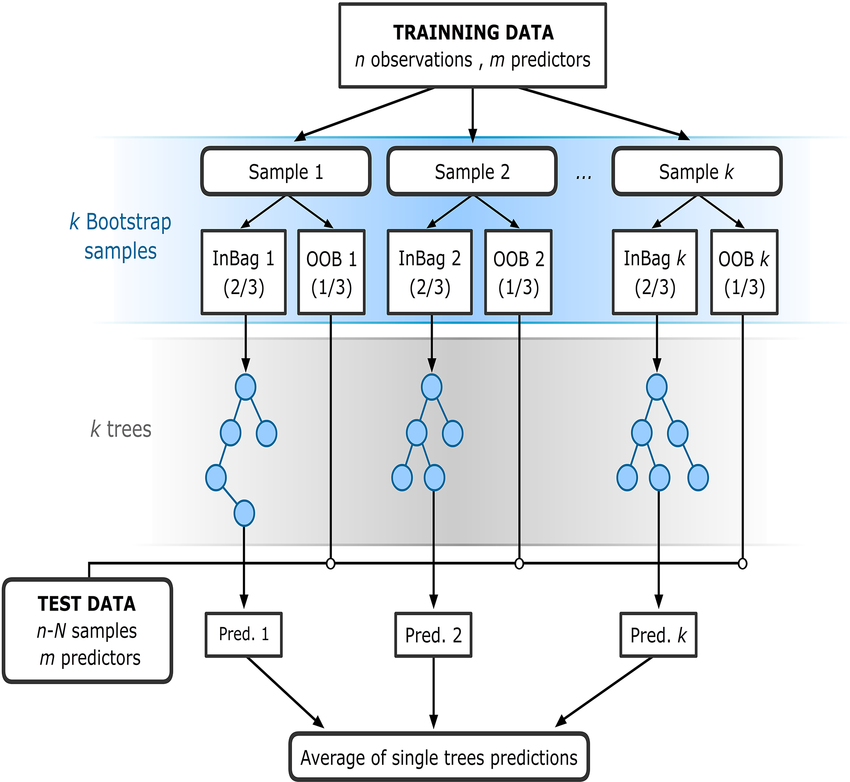

## Adaboost & Gradient Bosting

### 에이다부스트(Adaboost)

- **AdaBoost**(**Adaptive Boosting**)는 가장 간단한 형태의 부스팅 기법 중 하나로,

- 약한 학습기(Weak Learner)를 순차적으로 학습하면서, 이전 모델이 **틀린 샘플에 더 높은 가중치**를 부여하고,
  - 올바르게 분류한 샘플에 대한 가중치는 낮추어 오류를 점차 보정해 나가는 방식

- 결정 트리(깊이 1~2) 등의 아주 단순한 모델을 여러 개 쌓는 경우가 많음

- 구현이 간단하고 직관적이지만, 이상치나 노이즈에 민감할 수 있음

![alt text](image.png)

![alt text](<image (1)-1.png>)

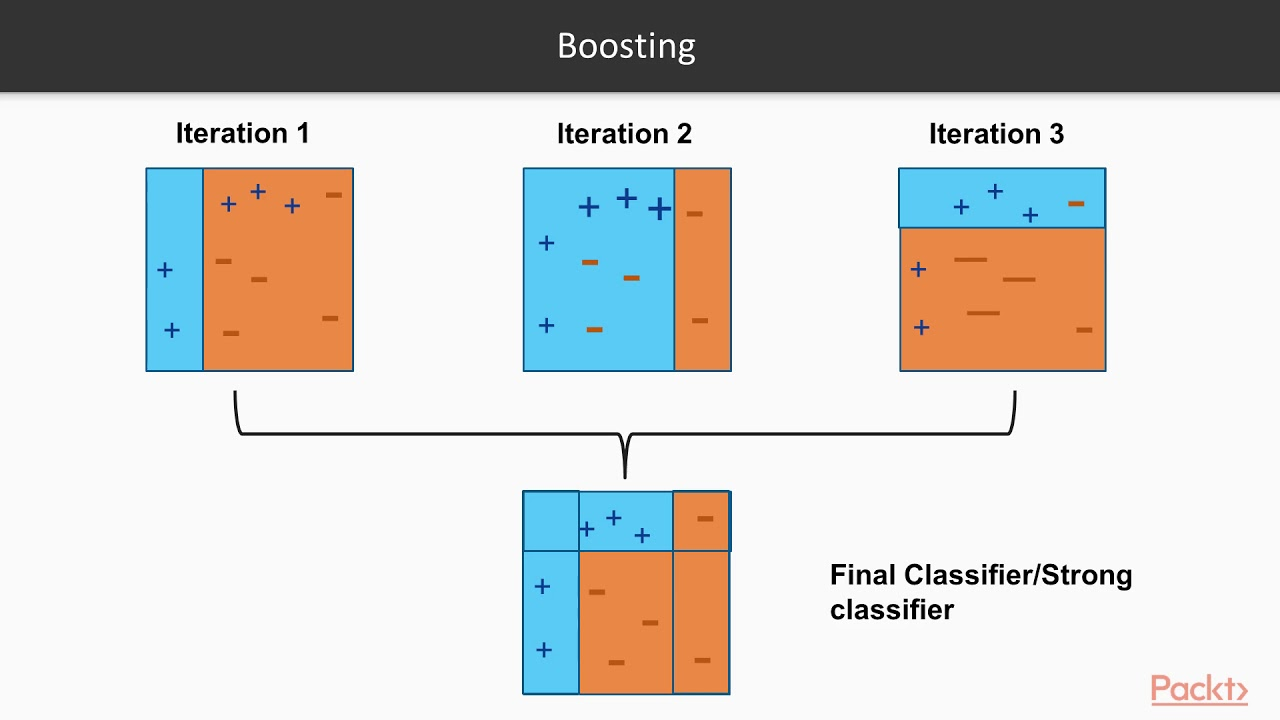

### 그래디언트부스팅(Gradient Boosting)

- 잔차(오차)에 대한 **기울기(Gradient) 정보를 사용**하여 순차적으로 모델을 개선하는 부스팅 기법

- 직접 샘플 가중치를 업데이트하기보다, **손실 함수를 미분(Gradient)하여** 현재 오차를 보정해줄 방향으로 다음 약한 학습기를 학습

- 이를 고속화·최적화한 XGBoost, LightGBM, CatBoost 등도 존재

- 높은 유연성과 성능, 그러나 학습 시간이 비교적 길고 파라미터가 많음

![alt text](<image (2).png>)

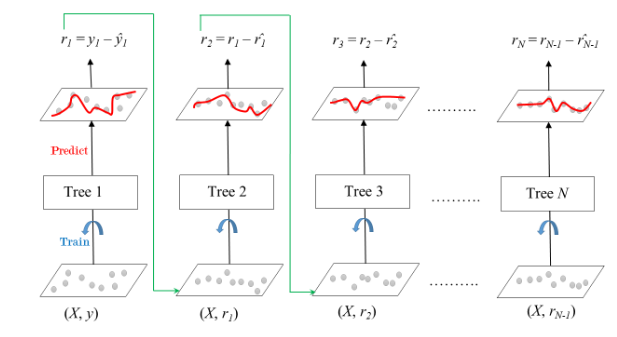

![alt text](<스크린샷 2025-04-29 094719.png>)

# 실습


In [ ]:
# libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data 불러오기

data_clf = pd.read_csv('bankloan.csv')
data_reg = pd.read_csv('data_reg.csv', index_col=0)

## 실습 - 분류(Classification)

<모델>
- Random Forest Classifier
- Adaboost Classifier
- Gradient Boosting Classifier
- Stacking Classifier (LogisticRegression, SVC, GaussianNB, RandomForestClassifier)

<데이터>
- 대출 승인 여부 예측
- X(features): 'ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities.Account', 'CD.Account', 'Online', 'CreditCard'
- y (dependent variable): 'Personal.Loan', 0 indicates loan not approved and 1 indicates loan approved.

In [ ]:
data_clf.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
# 데이터
features = data_clf.drop(columns=['ID','Personal.Loan'])
X_clf = features.dropna() #dropna
y_clf = data_clf['Personal.Loan'].loc[X_clf.index] #X에 맞춰서 인덱싱

In [ ]:
X_clf

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [ ]:
# 분류 타겟
y_clf.value_counts()

,count
Personal.Loan,
0,4520
1,480


### RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
 )

cross_val = cross_validate(
    estimator=model,
    X=X_clf, y=y_clf,
    cv=5,
    return_train_score=True
 )

print('Random Forest Avg. Train Score(분류): {} (+/- {})'.format(cross_val['train_score'].mean(), cross_val['train_score']))
print('Random Forest Avg. Test Score(분류): {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score']))

Random Forest Avg. Train Score(분류): 1.0 (+/- [1. 1. 1. 1. 1.])
Random Forest Avg. Test Score(분류): 0.9862 (+/- [0.986 0.986 0.982 0.991 0.986])


In [ ]:
# train / test
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, stratify=y_clf, test_size=0.3,random_state=803)

# scaling
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (3500, 12)
Test set dimension is (1500, 12)


100%|██████████| 50/50 [00:31<00:00,  1.60it/s]


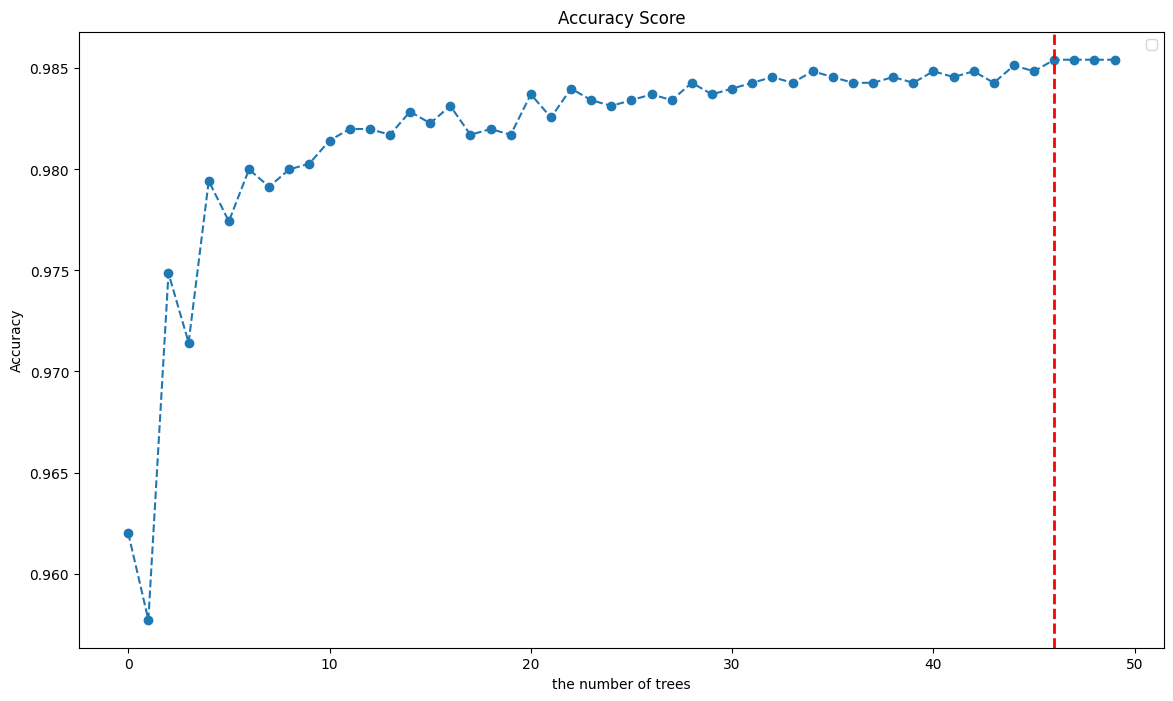

In [ ]:
# Grid search: number of trees

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

cv_scores = []
estimator_list =[i for i in range(0,50,1)]
for i in tqdm(range(0,50,1)):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=803)
    score = cross_val_score(rfc, X_train, y_train, cv=5, scoring = 'accuracy').mean()
    cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(14,8))
plt.legend(["Cross validation scores"])
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the number of trees")
plt.ylabel("Accuracy")
plt.title("Accuracy Score")
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [ ]:
print(f"최적 tree 개수:{(cv_scores.index(max(cv_scores)))+1}")
print(f"Train set accuracy (5 fold CV):{max(cv_scores):0.4f}")

최적 tree 개수:47
Train set accuracy (5 fold CV):0.9854


In [ ]:
rfc = RandomForestClassifier(n_estimators=47, n_jobs=-1, random_state=803)
rfc.fit(X_train, y_train)

# Train set에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print(f"Train set accuracy:{acc:0.4f}")

# Test set에 대한 성능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print(f"Test set accuracy:{acc:0.4f}")

Train set accuracy:1.0000
Test set accuracy:0.9867


In [ ]:
# Hyperparameter optimization
rfc = RandomForestClassifier(random_state=803)
param_grid = {
    'n_estimators': [50, 60, 70],
    'max_depth': [10, 15, 20],
    'max_leaf_nodes': [50, 100, 200],
    'criterion':['gini', 'entropy'],
    'max_features':['auto','sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=1 ,n_jobs=12)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=803),
             n_jobs=12,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [50, 100, 200],
                         'n_estimators': [50, 60, 70]},
             verbose=1)

In [ ]:
# Optimal hyperparameter set
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': 100,
 'n_estimators': 60}

In [ ]:
# Optimal model
best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=100, n_estimators=60,
                       random_state=803)

In [ ]:
# Train set에 대한 성능
y_pred = best_rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print(f"Train set accuracy:{acc:0.4f}")

# Test set에 대한 성능
y_pred = best_rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print(f"Test set accuracy:{acc:0.4f}")

Train set accuracy:0.9994
Test set accuracy:0.9860


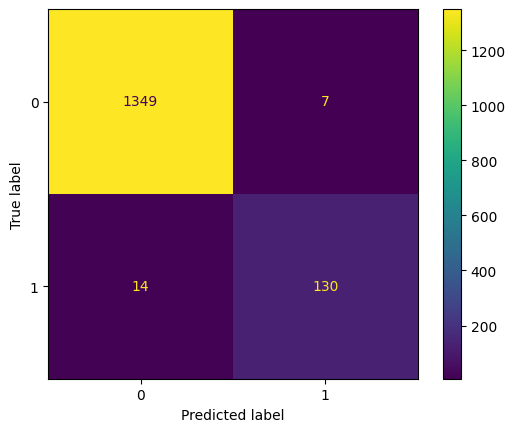

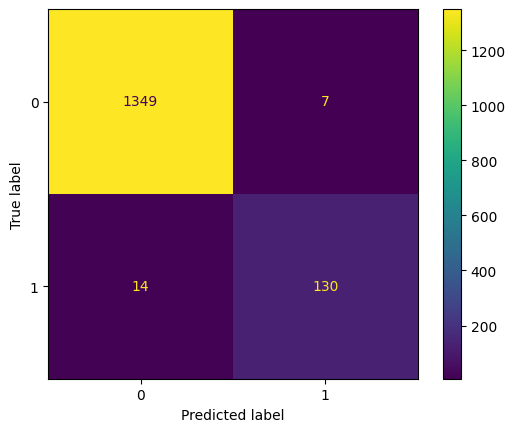

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.plot()
plt.show()

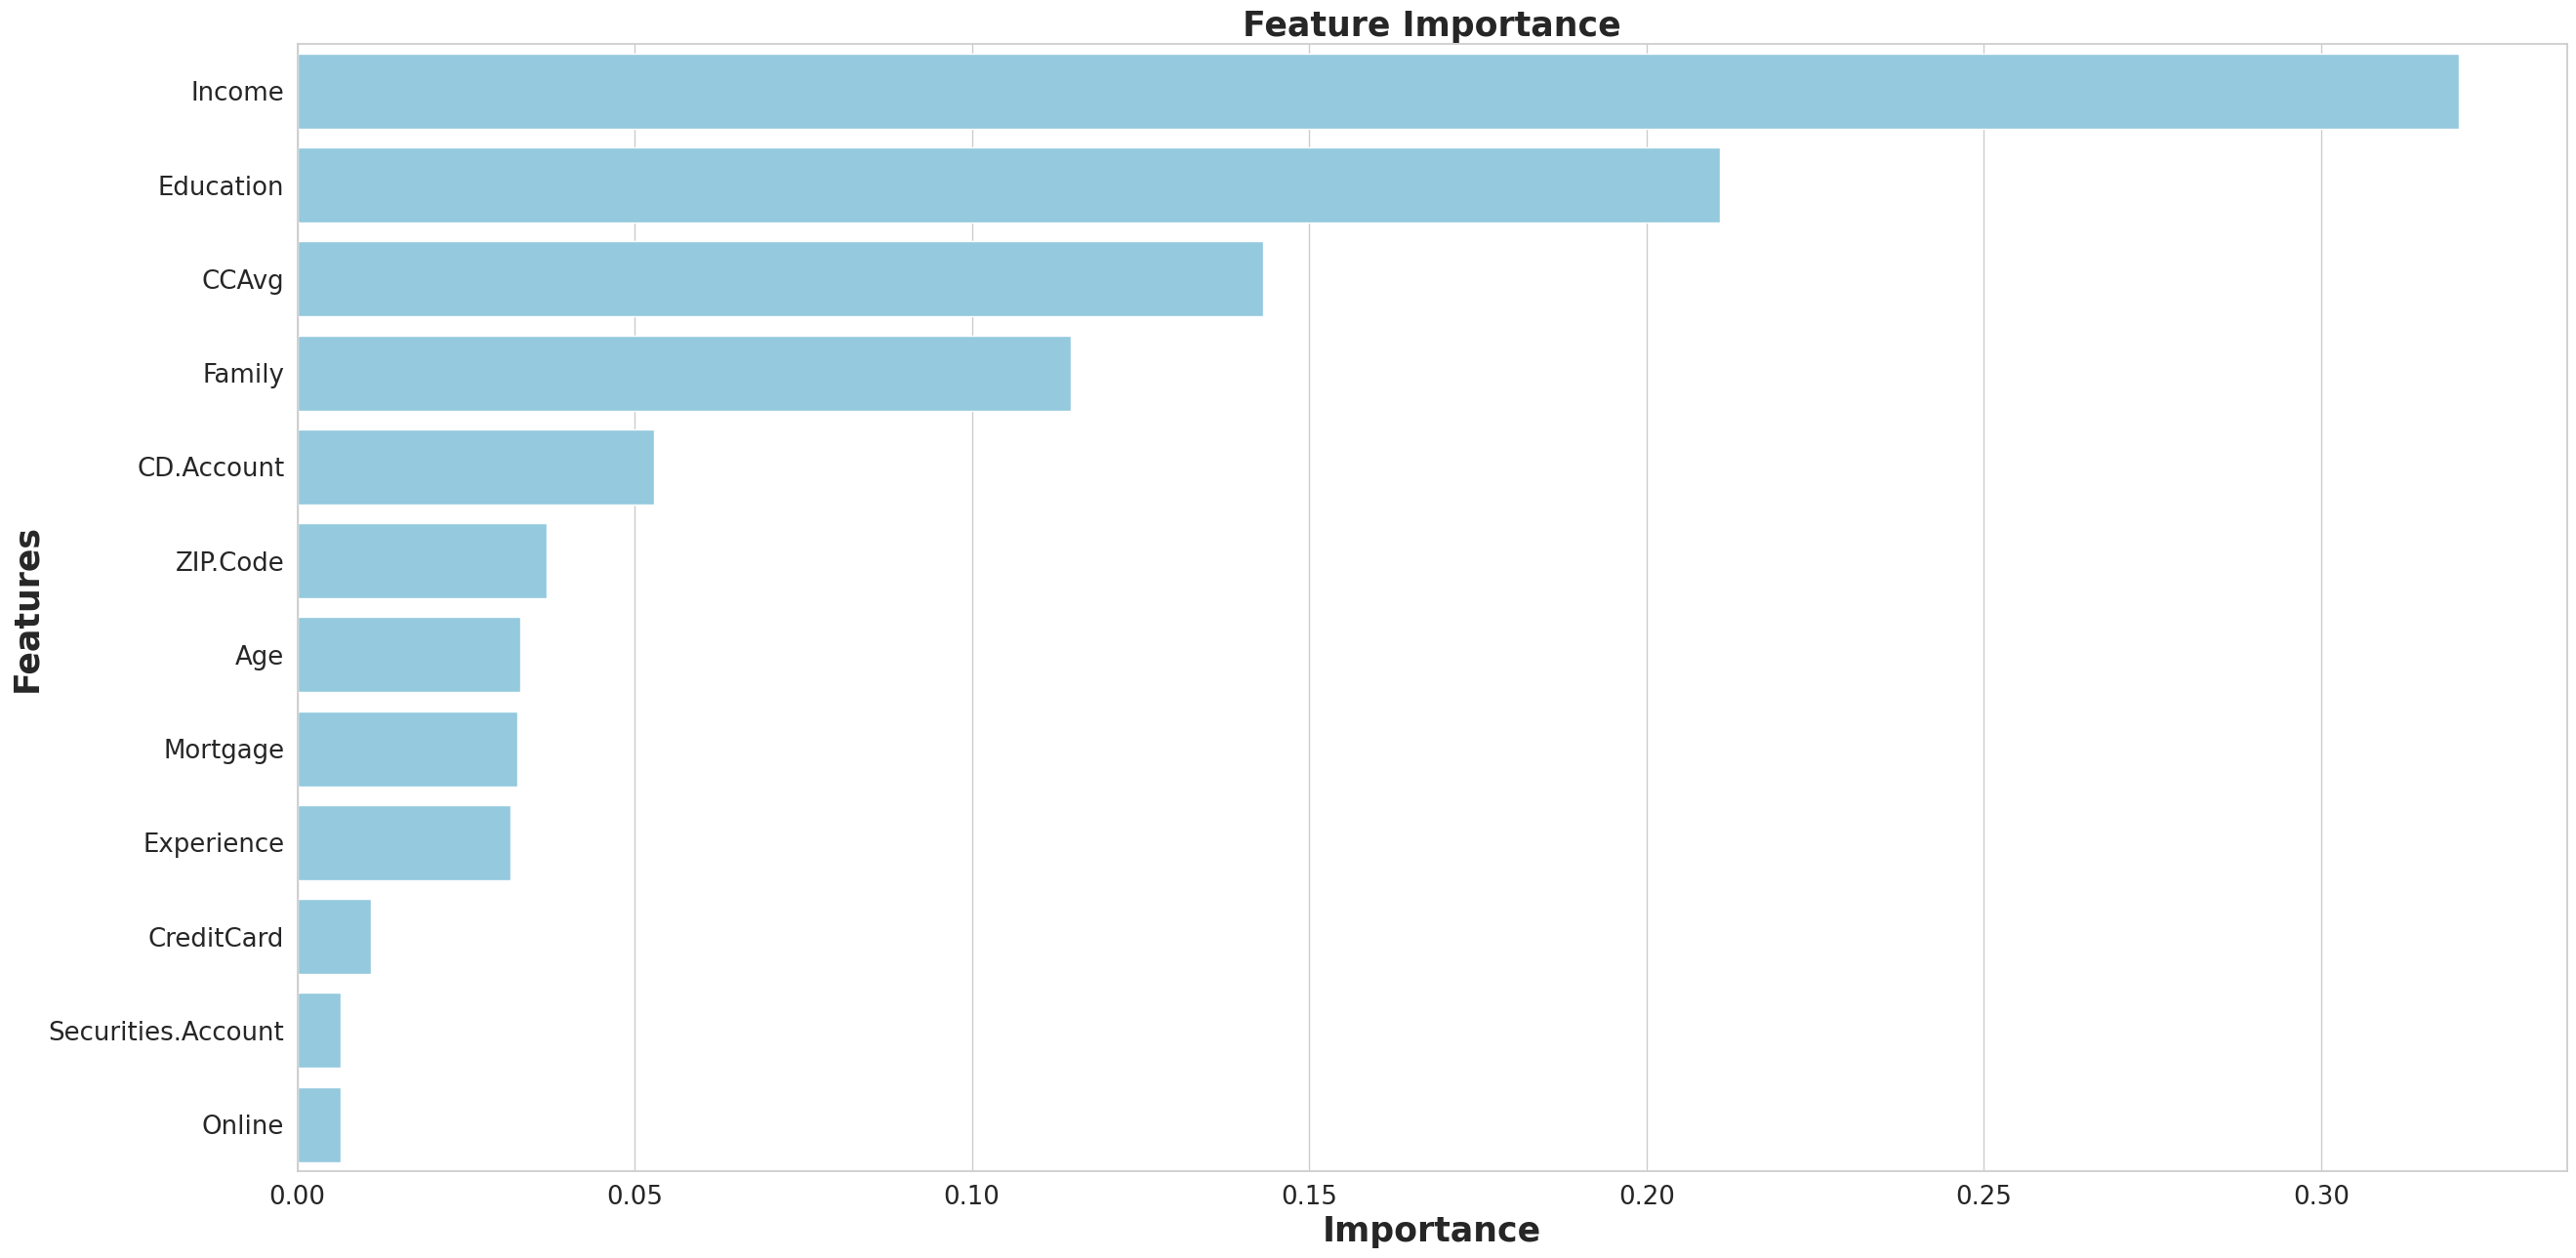

None

,Features,Gini-Importance
0,Income,0.320367
1,Education,0.210869
2,CCAvg,0.143096
3,Family,0.114630
4,CD.Account,0.052906
5,ZIP.Code,0.037022
6,Age,0.033021
7,Mortgage,0.032585
8,Experience,0.031643
9,CreditCard,0.010957


In [ ]:
# Feature importance (gini)
import seaborn as sns

feats = {}
for feature, importance in zip(X_clf.columns, best_rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

![alt text](<image (3).png>)

### Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
 )

cross_val = cross_validate(
    estimator=model,
    X=X_clf, y=y_clf,
    cv=5,
    return_train_score=True
 )

print('AdaBoost Avg. Train Score(분류): {} (+/- {})'.format(cross_val['train_score'].mean(), cross_val['train_score']))
print('AdaBoost Avg. Test Score(분류): {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score']))

AdaBoost Avg. Train Score(분류): 0.9688500000000001 (+/- [0.969   0.97025 0.96775 0.96675 0.9705 ])
AdaBoost Avg. Test Score(분류): 0.9662000000000001 (+/- [0.973 0.97  0.964 0.967 0.957])


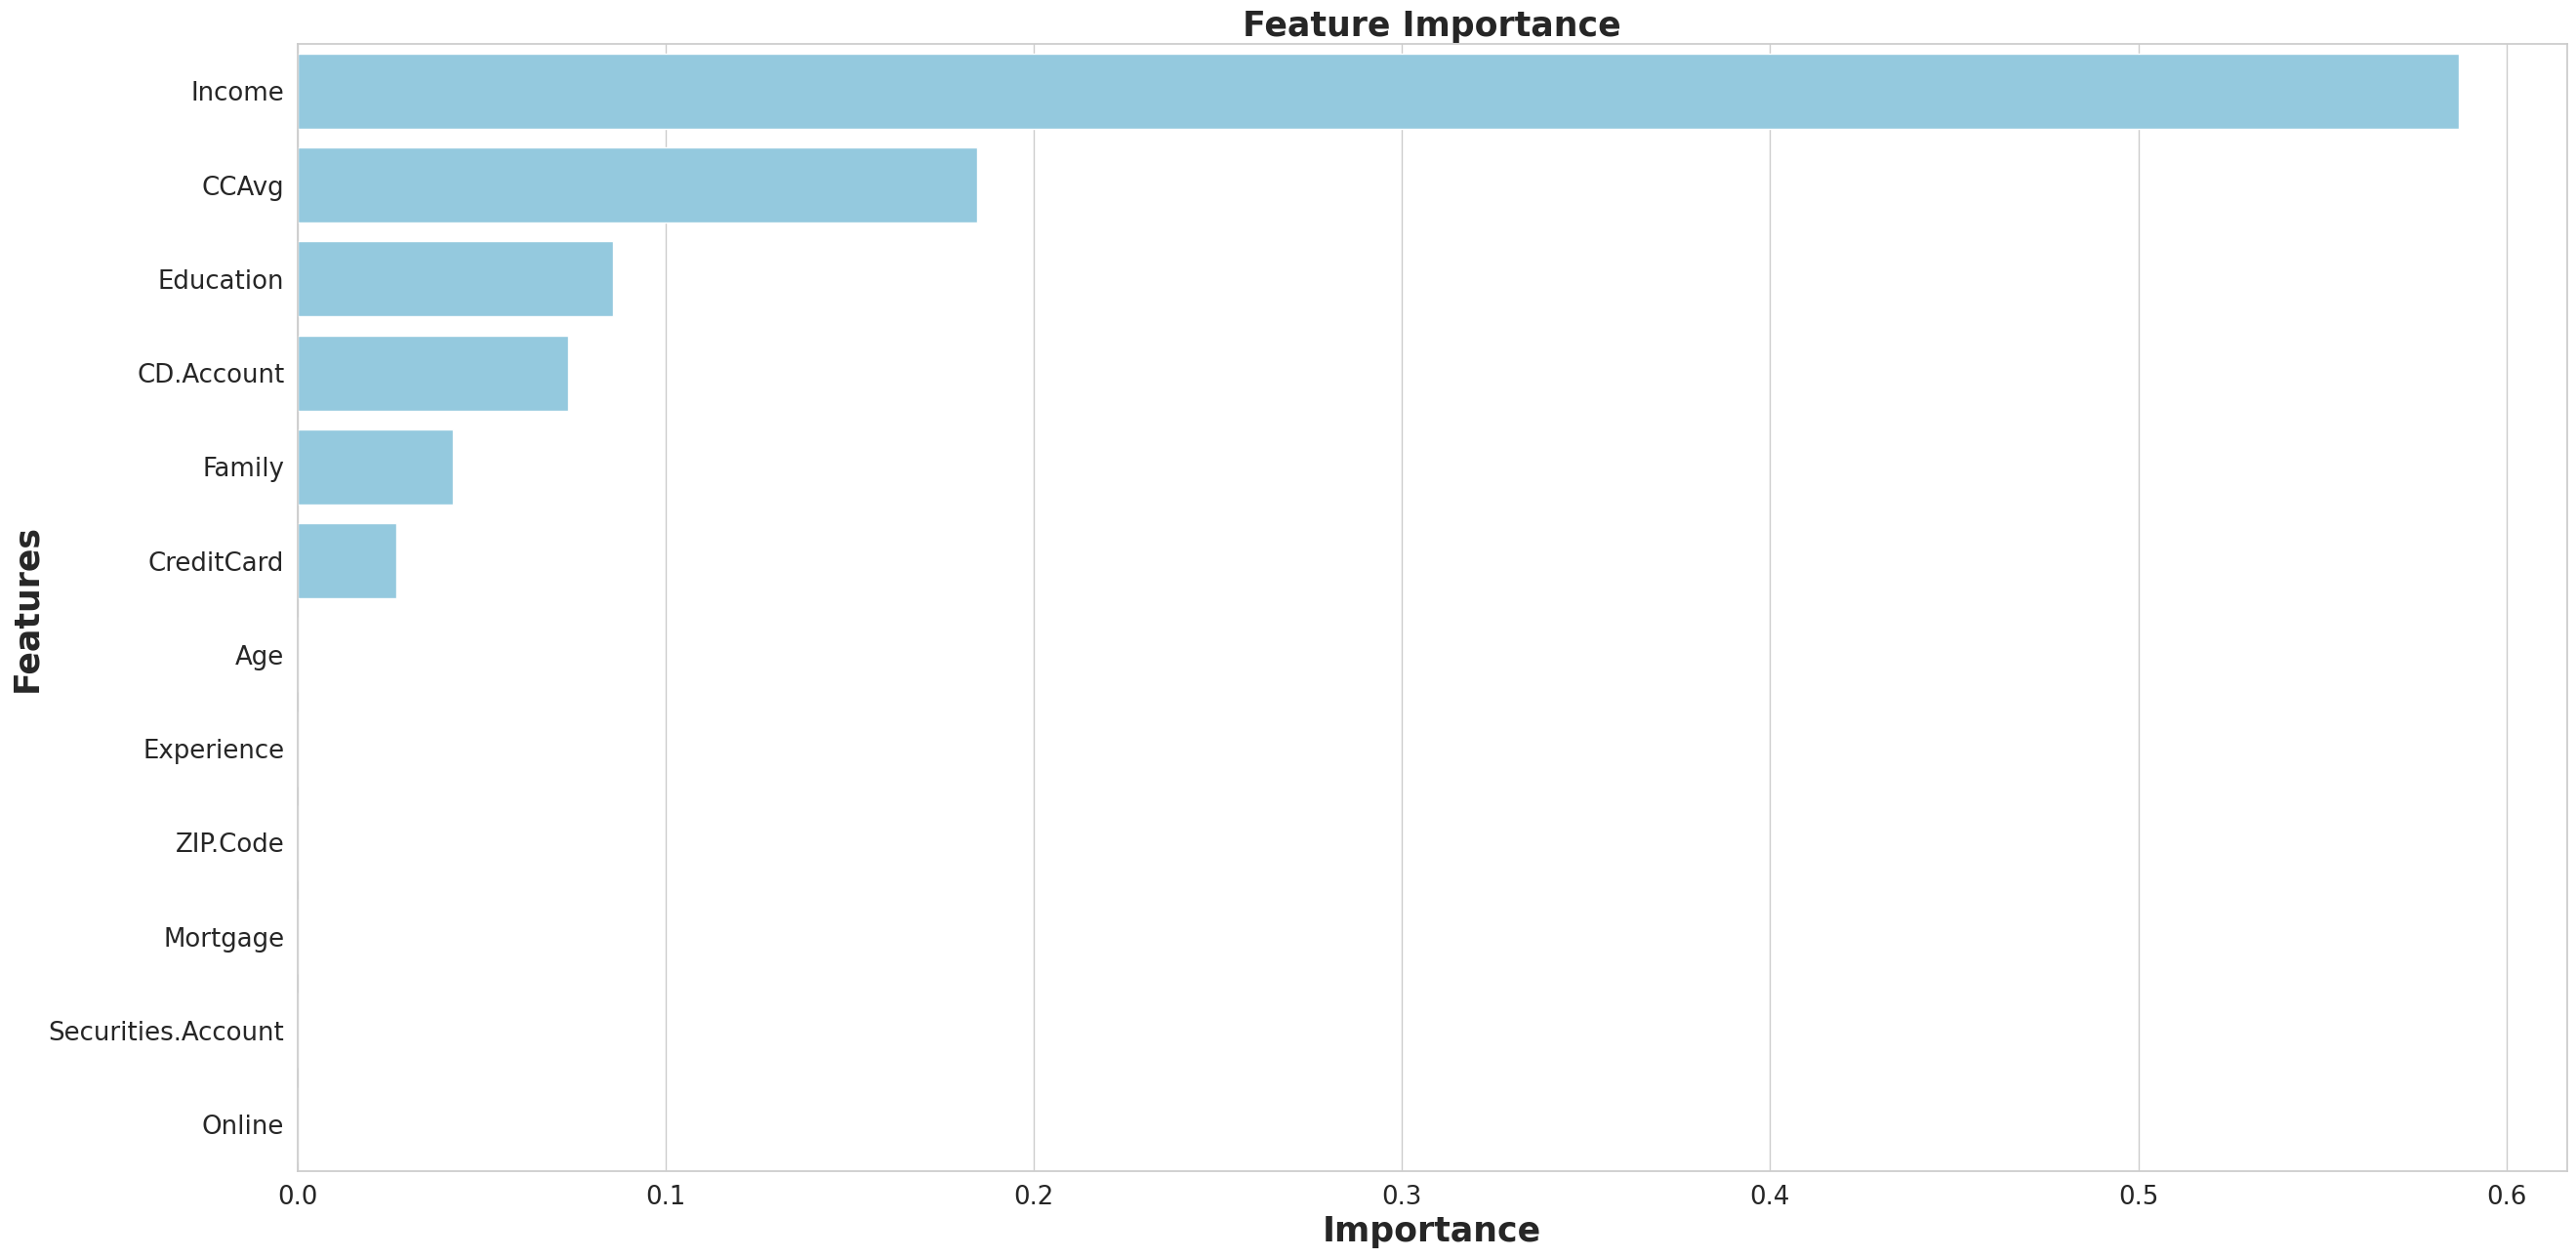

None

,Features,Gini-Importance
0,Income,0.587015
1,CCAvg,0.184665
2,Education,0.085808
3,CD.Account,0.073505
4,Family,0.042191
5,CreditCard,0.026816
6,Age,0.000000
7,Experience,0.000000
8,ZIP.Code,0.000000
9,Mortgage,0.000000


In [ ]:
abc = AdaBoostClassifier(random_state=803)
abc.fit(X_train, y_train)

feats = {}
for feature, importance in zip(X_clf.columns, abc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

### Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
 )

cross_val = cross_validate(
    estimator=model,
    X=X_clf, y=y_clf,
    cv=5,
    return_train_score=True
 )

print('GradientBoosting Avg. Train Score(분류): {} (+/- {})'.format(cross_val['train_score'].mean(), cross_val['train_score']))
print('GradientBoosting Avg. Test Score(분류): {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score']))

GradientBoosting Avg. Train Score(분류): 0.9947000000000001 (+/- [0.995   0.9955  0.99425 0.99425 0.9945 ])
GradientBoosting Avg. Test Score(분류): 0.9853999999999999 (+/- [0.986 0.987 0.981 0.989 0.984])


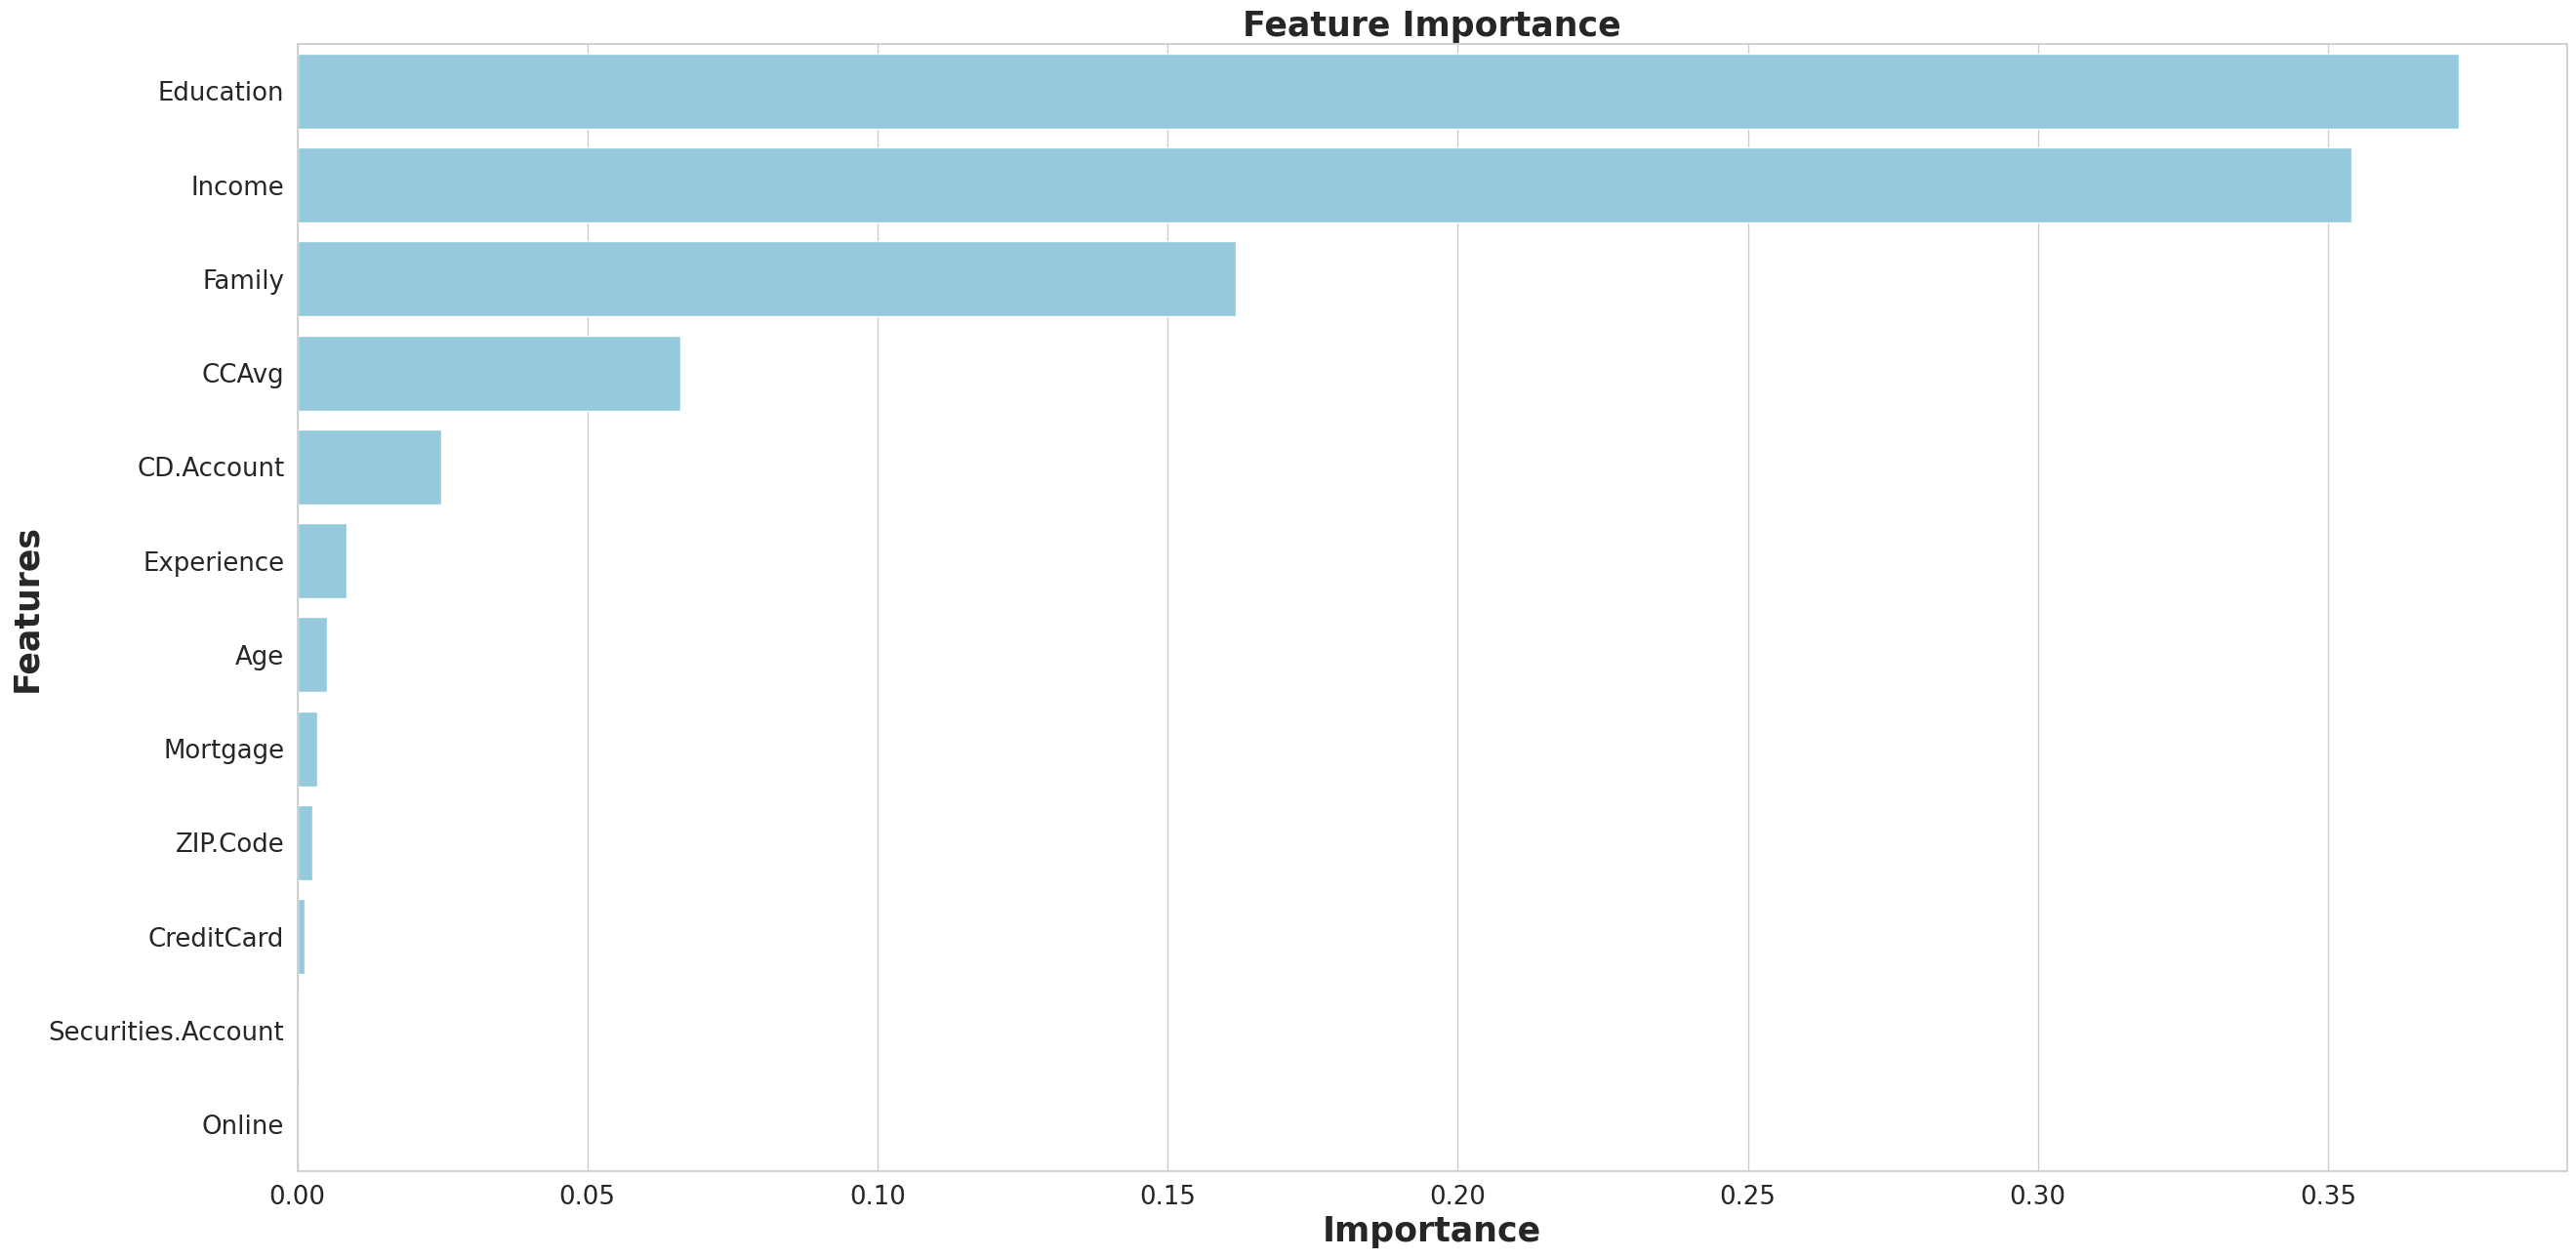

None

,Features,Gini-Importance
0,Education,0.372521
1,Income,0.353997
2,Family,0.161837
3,CCAvg,0.066016
4,CD.Account,0.024754
5,Experience,0.008543
6,Age,0.005078
7,Mortgage,0.003406
8,ZIP.Code,0.002524
9,CreditCard,0.001193


In [ ]:
gbc = GradientBoostingClassifier(random_state=803) # 기본값: max_depth=3, learning_rate=0.1
gbc.fit(X_train, y_train)

feats = {}
for feature, importance in zip(X_clf.columns, gbc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

### Stacking Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('logistic', LogisticRegression(max_iter=10000)),
               ('svc', SVC()),
               ('naive', GaussianNB())]

clf_stacked = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier())

In [ ]:
model = make_pipeline(
    StandardScaler(),
    clf_stacked
 )

cross_val = cross_validate(
    estimator=model,
    X=X_clf, y=y_clf,
    cv=5,
    return_train_score=True
 )

print('Stacking Classifier Avg. Train Score(분류): {} (+/- {})'.format(cross_val['train_score'].mean(), cross_val['train_score']))
print('Stacking Classifier Avg. Test Score(분류): {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score']))

Stacking Classifier Avg. Train Score(분류): 0.98665 (+/- [0.9885  0.98575 0.98525 0.9865  0.98725])
Stacking Classifier Avg. Test Score(분류): 0.9764000000000002 (+/- [0.974 0.978 0.982 0.971 0.977])


## 실습 - 회귀(Regression)

<모델>
- Random Forest Regressor
- Adaboost Regressor
- Gradient Boosting Regressor
- Stacking Regressor (Ridge, Lasso, SVR, GradientBoosting)

<데이터>
- 주택가격 예측
- X(features): 80개 -> 63개(전처리 후) 집 관련 정보들
- y(target): SalePrice

### 데이터

In [ ]:
data_reg

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [ ]:
# 전처리

from sklearn.preprocessing import LabelEncoder

# 1. NaN 값이 10개 이상 있는 컬럼 제거
na_threshold = 10
na_counts = data_reg.isnull().sum()
cols_to_drop = na_counts[na_counts >= na_threshold].index
data = data_reg.drop(cols_to_drop, axis=1)

# 2. 수치형, 범주형 컬럼 구분
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# 3. 수치형 결측치는 중앙값으로 채우기
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# 4. 범주형 결측치는 'None'으로 채우기
data[cat_cols] = data[cat_cols].fillna('None')

# 5. 범주형 컬럼 Label Encoding 적용
for col in cat_cols:
    lbl = LabelEncoder()
    data[col] = lbl.fit_transform(data[col])

# 최종 데이터 확인
data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
2,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
3,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
4,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
5,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,3,7917,1,3,3,0,4,0,8,...,0,0,0,0,0,8,2007,8,4,175000
1457,20,3,13175,1,3,3,0,4,0,14,...,0,0,0,0,0,2,2010,8,4,210000
1458,70,3,9042,1,3,3,0,4,0,6,...,0,0,0,0,2500,5,2010,8,4,266500


In [ ]:
# 데이터 (X, y)
X_rg = data.iloc[:,:-1].dropna() #dropna

# 주택 가격
y_rg = data['SalePrice'].loc[X_rg.index] #X에 맞춰서 인덱싱

In [ ]:
X_rg

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,8450,1,3,3,0,4,0,5,...,61,0,0,0,0,0,2,2008,8,4
2,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,0,5,2007,8,4
3,60,3,11250,1,0,3,0,4,0,5,...,42,0,0,0,0,0,9,2008,8,4
4,70,3,9550,1,0,3,0,0,0,6,...,35,272,0,0,0,0,2,2006,8,0
5,60,3,14260,1,0,3,0,2,0,15,...,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,3,7917,1,3,3,0,4,0,8,...,40,0,0,0,0,0,8,2007,8,4
1457,20,3,13175,1,3,3,0,4,0,14,...,0,0,0,0,0,0,2,2010,8,4
1458,70,3,9042,1,3,3,0,4,0,6,...,60,0,0,0,0,2500,5,2010,8,4


In [ ]:
# 회귀 타겟
y_rg

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000
...,...
1456,175000
1457,210000
1458,266500


### RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
 )

cross_val = cross_validate(
    estimator=model,
    X=X_rg, y=y_rg,
    cv=3,
    return_train_score=True
 )

print('Random Forest Avg. Train Score(회귀): {} (+/- {})'.format(cross_val['train_score'].mean(), cross_val['train_score']))
print('Random Forest Avg. Test Score(회귀): {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score']))

Random Forest Avg. Train Score(회귀): 0.9796191084100441 (+/- [0.9798353  0.98027234 0.97874969])
Random Forest Avg. Test Score(회귀): 0.8561562828051565 (+/- [0.88331209 0.85191001 0.83324676])


In [ ]:
# Hyperparameter optimization
rfr = RandomForestRegressor(random_state=22)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'criterion':['friedman_mse', 'squared_error']
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3, verbose=1 ,n_jobs=12)

In [ ]:
model = make_pipeline(
    StandardScaler(),
    CV_rfr
 )

cross_val = cross_validate(
    estimator=model,
    X=X_rg, y=y_rg,
    cv=3,
    return_train_score=True
 )

print('Random Forest Avg. Train Score(회귀): {} (+/- {})'.format(cross_val['train_score'].mean(), cross_val['train_score']))
print('Random Forest Avg. Test Score(회귀): {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score']))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Random Forest Avg. Train Score(회귀): 0.9791713381847612 (+/- [0.9795967  0.98030553 0.97761178])
Random Forest Avg. Test Score(회귀): 0.8555768100100664 (+/- [0.88538048 0.85511151 0.82623844])


- 하이퍼파라미터 튜닝해도 결과는 비슷하니, 그냥 스킵하자

In [ ]:
# train / test
X_train, X_test, y_train, y_test = train_test_split(X_rg, y_rg, test_size=0.3,random_state=777)

# scaling
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (1022, 62)
Test set dimension is (438, 62)


결과 시각화를 위해 CV가 아닌 train-test split을 했다.
시각화 결과와 위의 스코어는 대상이 다르니 참고하시길 바란다.

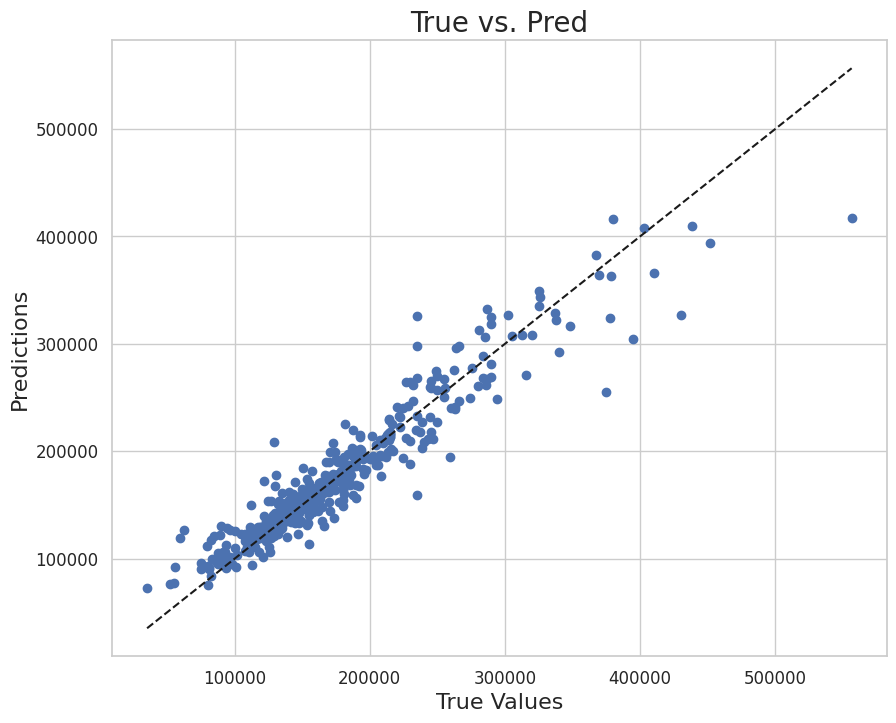

In [ ]:
rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(X_train, y_train)

# test set에 대한 성능
y_pred = rfr.predict(X_test)
# 산점도 그리기
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values',fontsize=16)
plt.ylabel('Predictions',fontsize=16)
plt.title('True vs. Pred',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # 완벽한 예측 기준선
plt.show()

### Adaboost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
 )

cross_val = cross_validate(
    estimator=model,
    X=X_rg, y=y_rg,
    cv=3,
    return_train_score=True
 )

print('AdaBoost Avg. Train Score(회귀): {} (+/- {})'.format(cross_val['train_score'].mean(), cross_val['train_score']))
print('AdaBoost Avg. Test Score(회귀): {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score']))

AdaBoost Avg. Train Score(회귀): 0.88043023517791 (+/- [0.87435728 0.87570913 0.8912243 ])
AdaBoost Avg. Test Score(회귀): 0.7953024571523732 (+/- [0.84660375 0.79493458 0.74436904])


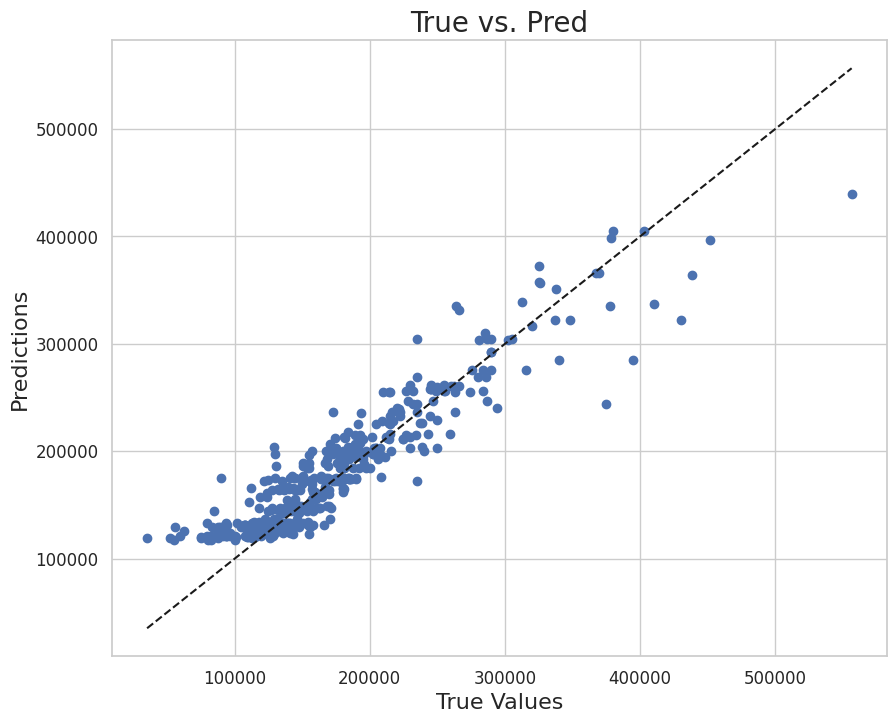

In [ ]:
adr = AdaBoostRegressor()
adr.fit(X_train, y_train)

# test set에 대한 성능
y_pred = adr.predict(X_test)
# 산점도 그리기
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values',fontsize=16)
plt.ylabel('Predictions',fontsize=16)
plt.title('True vs. Pred',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # 완벽한 예측 기준선
plt.show()

### Gradient Boost Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
 )

cross_val = cross_validate(
    estimator=model,
    X=X_rg, y=y_rg,
    cv=3,
    return_train_score=True
 )

print('GradientBoosting Avg. Train Score(회귀): {} (+/- {})'.format(cross_val['train_score'].mean(), cross_val['train_score']))
print('GradientBoosting Avg. Test Score(회귀): {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score']))

GradientBoosting Avg. Train Score(회귀): 0.9713619069478502 (+/- [0.97112214 0.97242478 0.97053879])
GradientBoosting Avg. Test Score(회귀): 0.8875849803369903 (+/- [0.91623371 0.86091771 0.88560353])


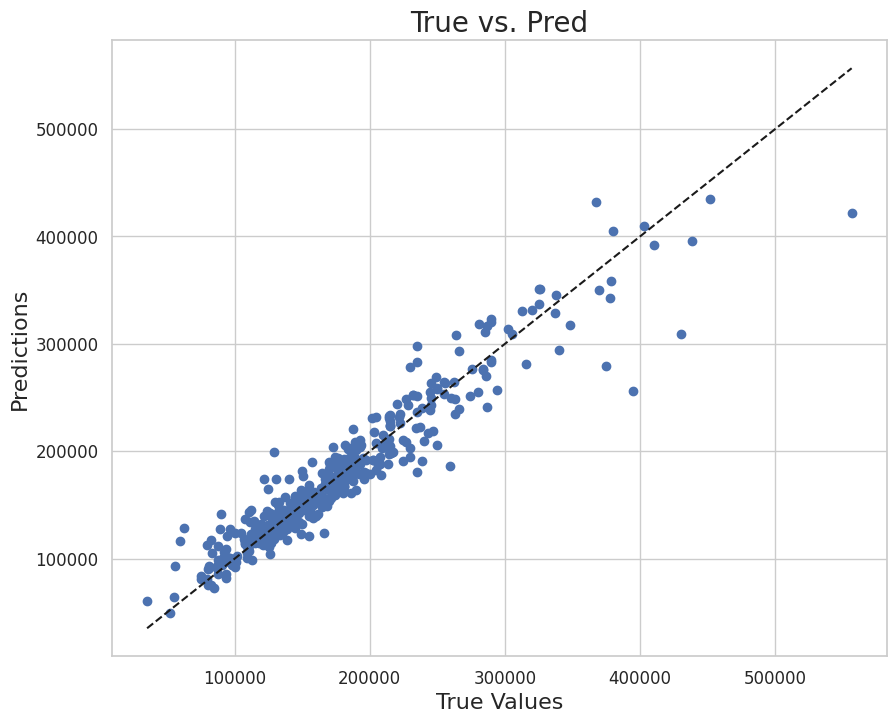

In [ ]:
gdr = GradientBoostingRegressor()
gdr.fit(X_train, y_train)

# test set에 대한 성능
y_pred = gdr.predict(X_test)
# 산점도 그리기
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values',fontsize=16)
plt.ylabel('Predictions',fontsize=16)
plt.title('True vs. Pred',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # 완벽한 예측 기준선
plt.show()

### Stacking Regressor

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

reg_stacked = StackingRegressor(estimators=estimators,
        final_estimator=GradientBoostingRegressor())

In [ ]:
model = make_pipeline(
    StandardScaler(),
    reg_stacked
 )

cross_val = cross_validate(
    estimator=model,
    X=X_rg, y=y_rg,
    cv=3,
    return_train_score=True
 )

print('Stacking Regressor Avg. Train Score(회귀): {} (+/- {})'.format(cross_val['train_score'].mean(), cross_val['train_score']))
print('Stacking Regressor Avg. Test Score(회귀): {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score']))

Stacking Regressor Avg. Train Score(회귀): 0.8618879626431992 (+/- [0.82036611 0.87881395 0.88648383])
Stacking Regressor Avg. Test Score(회귀): 0.852522284411526 (+/- [0.85413979 0.84308538 0.86034168])


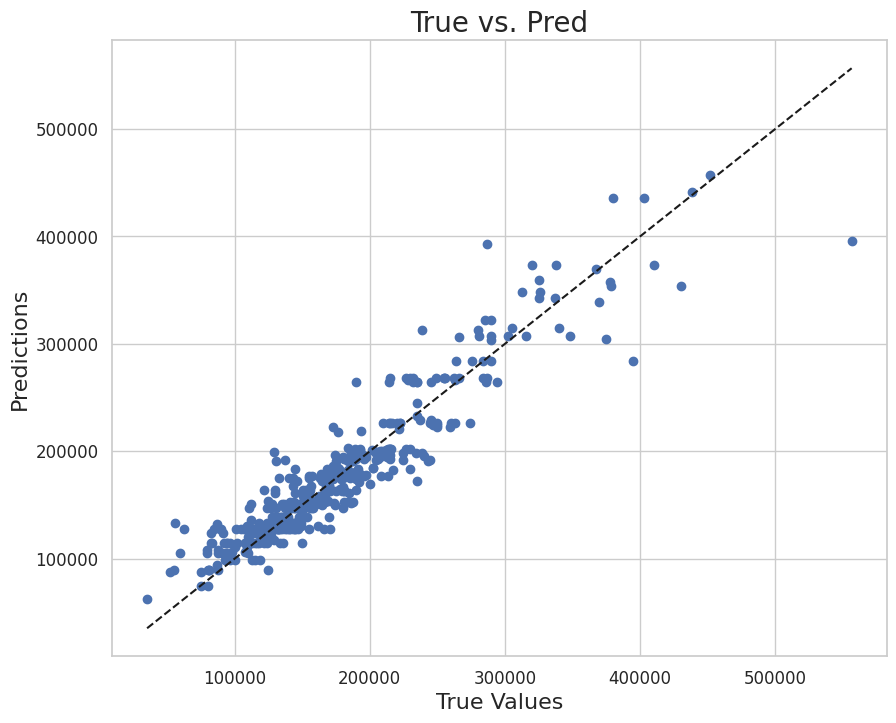

In [ ]:
reg_stacked.fit(X_train, y_train)

# test set에 대한 성능
y_pred = reg_stacked.predict(X_test)
# 산점도 그리기
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values',fontsize=16)
plt.ylabel('Predictions',fontsize=16)
plt.title('True vs. Pred',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # 완벽한 예측 기준선
plt.show()

회귀 결과:
- GradientBoosting > RandomForest > StackingModel > Adaboost 순으로 성능이 좋음
- 물론, 하이퍼파라미터 튜닝이 안되어있긴 함